In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "https://raw.githubusercontent.com/devvratmiglani/SA_Mini_Project_5th_SEM/main/mental_health.csv"
df = pd.read_csv(path)

## **Data Preprocessing**

In [ ]:
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


In [ ]:
# checking missing values
df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
# checking for duplicate values
df[df.duplicated()]

,text,label
12573,real suppleroot hours up day far,0
22389,real suppleroot hours up day far,0
22603,posting ara ara forget day ara ara,0
24502,happy birthday everyone birthday st october ha...,0
24970,need help anyone good pythagriam tribometry h...,0


In [ ]:
#dropping duplicate values
df = df.drop_duplicates()

In [ ]:
df[df.duplicated()]

,text,label


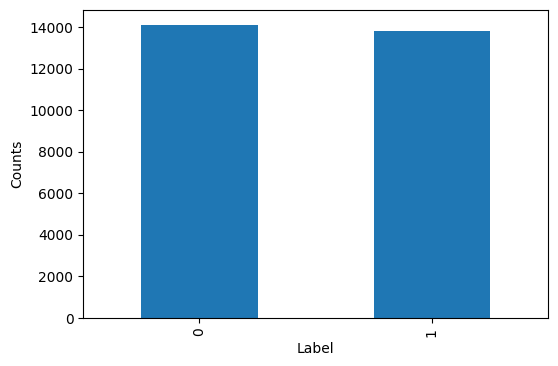

In [ ]:
import matplotlib.pyplot as plt

category_counts = df['label'].value_counts()

# Bar chart
plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Counts')
plt.show()
print()

plt.show()

In [ ]:
# Word Cloud

stress_data = df[df['label'] == 1]['text']
nonstress_data = df[df['label'] == 0]['text']

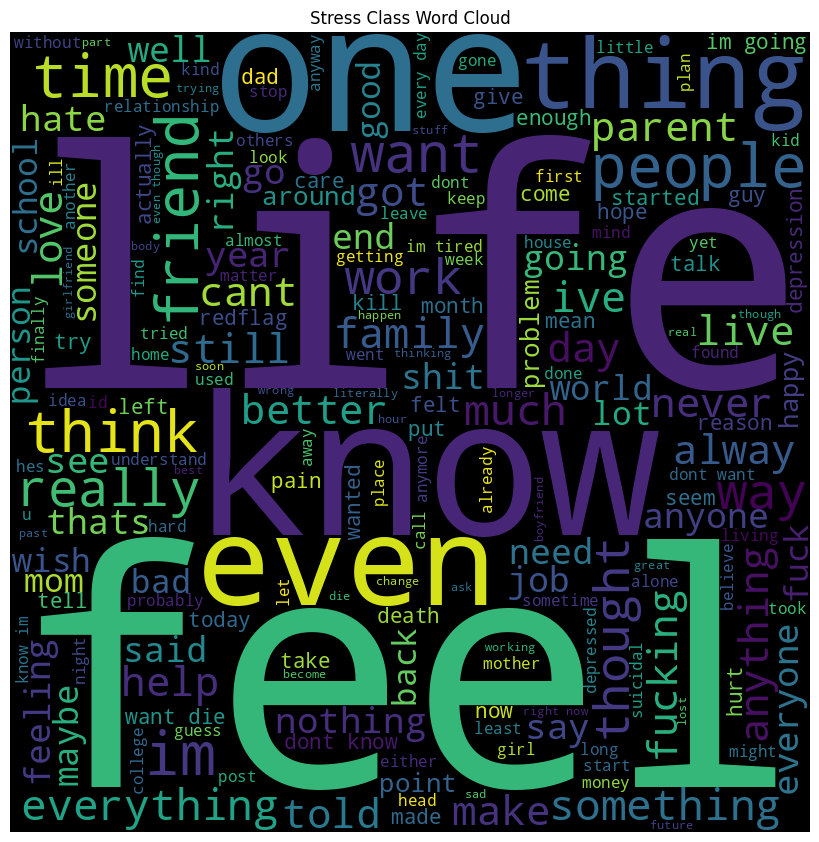

In [ ]:
from wordcloud import WordCloud

# Function to generate word cloud for a given text data
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10).generate(' '.join(data))

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.title(title)
    plt.show()

# Generate word cloud for mental class
generate_wordcloud(stress_data, 'Stress Class Word Cloud')

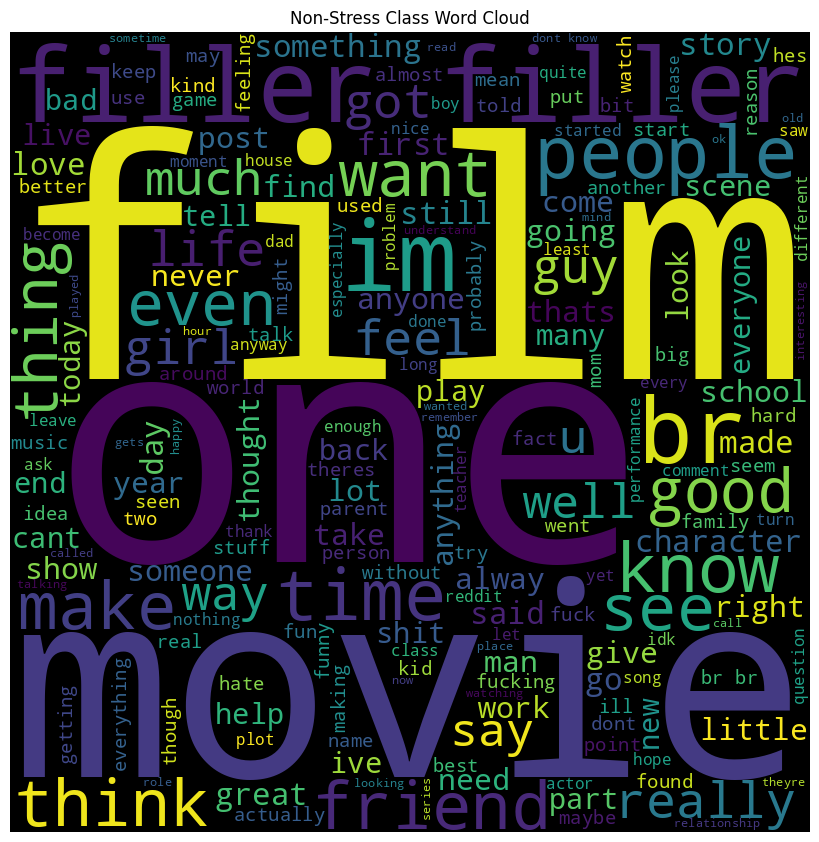

In [ ]:
generate_wordcloud(nonstress_data, 'Non-Stress Class Word Cloud')

# **Lemmatization**


In [ ]:
# it is a method by which we can turn the words into their base form ie simpler form which eventually helps us to perform and train our model well

import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def text_lemmatize(text):
    word_list = nltk.word_tokenize(text) # tokenize the sentence

    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])  # Lemmatize list of words and join

    return lemmatized_output

In [ ]:
df['text'] = df['text'].apply(text_lemmatize)

In [ ]:
df.head(5)

,text,label
0,dear american teen question dutch person heard...,0
1,nothing look forward lifei dont many reason ke...,1
2,music recommendation im looking expand playlis...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physica...,1


In [ ]:
# removal of stop words

def remove_stopwords(sentence):
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
                 "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out",
                 "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was",
                 "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

In [ ]:
df['text'] = df['text'].apply(remove_stopwords)

In [ ]:
df['label_name'] = df.label.map({
    0: 'No stress',
    1: 'Stress'
})

In [ ]:
df.head(5)

,text,label,label_name
0,dear american teen question dutch person heard...,0,No stress
1,nothing look forward lifei dont many reason ke...,1,Stress
2,music recommendation im looking expand playlis...,0,No stress
3,im done trying feel betterthe reason im still ...,1,Stress
4,worried year old girl subject domestic physica...,1,Stress


In [ ]:
# splitting the data into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.text,
    df.label,
    test_size=0.3, # 30% samples will go to test dataset ie 70-30
    random_state=42,
    stratify=df.label
)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19580,)
Shape of X_test:  (8392,)


In [ ]:
X_train.head()

2760     im currently year old think ever happyim curre...
26159    sunday july first episode new science fiction ...
23097    anyone wan na go yeeeeeeeeeeeeeeeeeeeeee yeeee...
9298     im pregnant still want kill myselfi feel selfi...
18296                                   swag gim swag took
Name: text, dtype: object

In [ ]:
# we will be using tf-idf for text vectorization which is simply converting the text into mumeric vectors

#1. Multinomial Naive Bayes Classifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc, accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
classification_reports = {}

In [ ]:
mnb_model = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('MultinomialNB', MultinomialNB(alpha=1.0))
])

mnb_model.fit(X_train, y_train)

y_pred = mnb_model.predict(X_test)

CR = classification_report(y_test, y_pred)
classification_reports['Multinomial Naive Bayes Classifier'] = CR
print(CR)

# Multinomial Naive Bayes has the accuracy of 85%

              precision    recall  f1-score   support

           0       0.98      0.71      0.83      4240
           1       0.77      0.99      0.87      4152

    accuracy                           0.85      8392
   macro avg       0.88      0.85      0.85      8392
weighted avg       0.88      0.85      0.85      8392



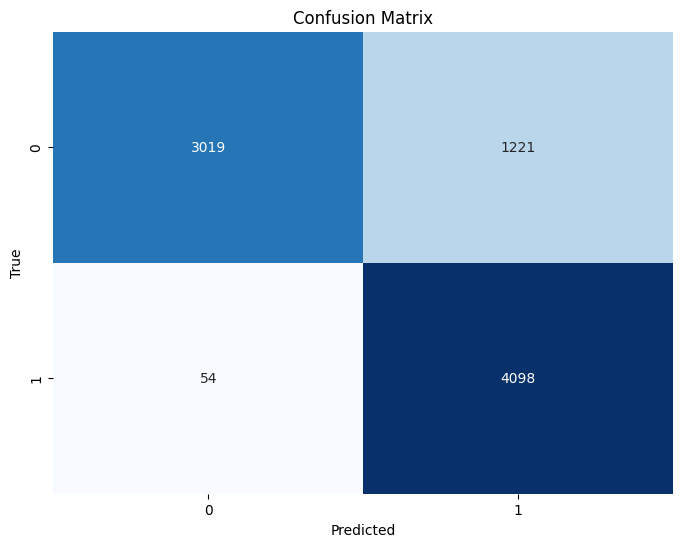

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

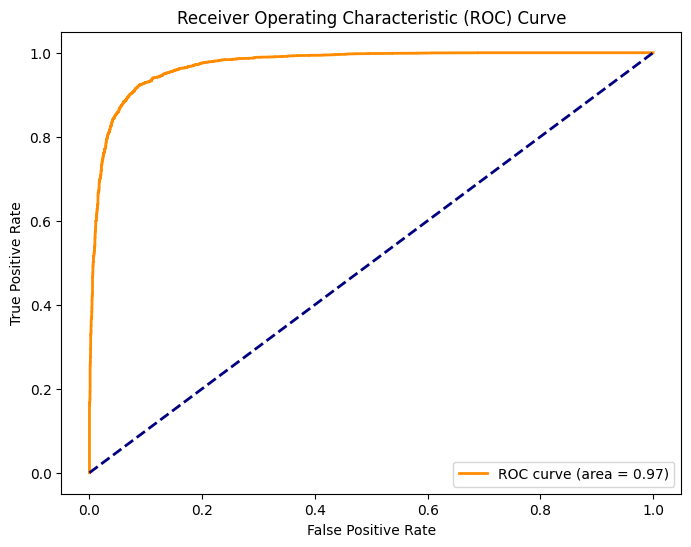

In [ ]:
# ROC Curve
y_probs = mnb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
X_test[:5]

21659    im confident look idk randomly get super insec...
12972    often yall beat meat normally november bored w...
7376     feel useless society really know going doi fir...
20236    cant stop sobbingcorbin acting weird started i...
20399    hmm put thing called love fantasm created huma...
Name: text, dtype: object

In [ ]:
y_test[:5]

21659    0
12972    0
7376     1
20236    1
20399    1
Name: label, dtype: int64

In [ ]:
y_pred[:5]

array([0, 0, 1, 1, 1])

In [ ]:
#2. Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Random Forest', RandomForestClassifier())
])

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

CR = classification_report(y_test, y_pred)
classification_reports['Random Forest Classifier'] = CR
print(CR)

# Random Forest Classifier has the accuracy of 90%

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4240
           1       0.90      0.89      0.90      4152

    accuracy                           0.90      8392
   macro avg       0.90      0.90      0.90      8392
weighted avg       0.90      0.90      0.90      8392



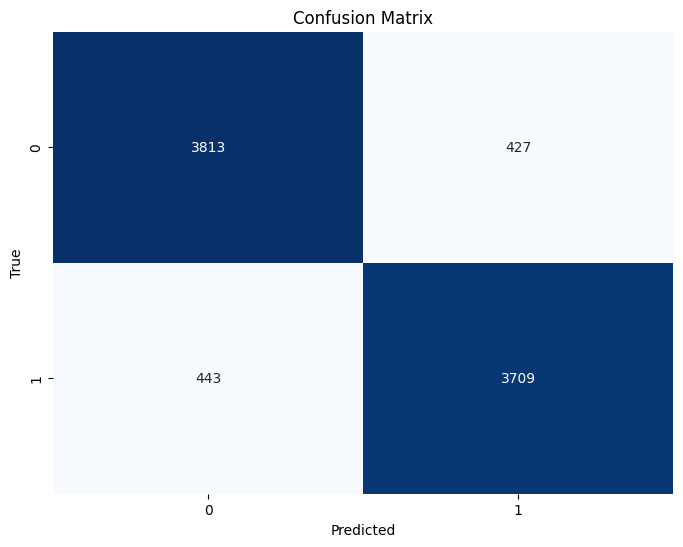

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

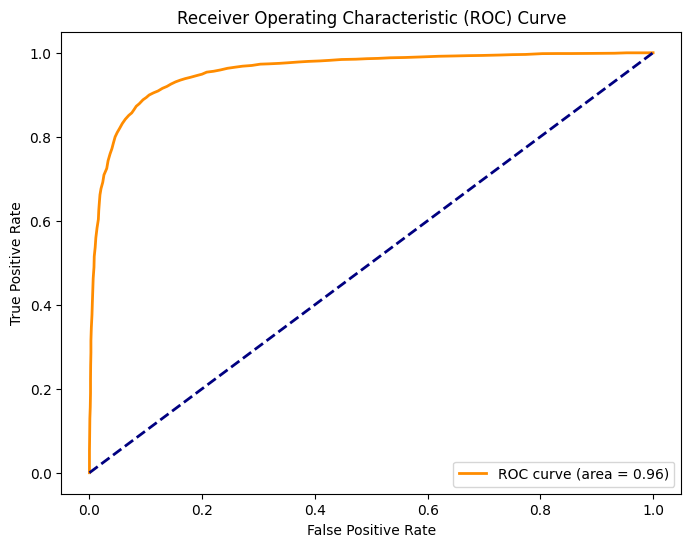

In [ ]:
# ROC Curve
y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#3. Support Vector Machine

from sklearn.svm import SVC

svm_model = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('SVC', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42))
])

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

CR = classification_report(y_test, y_pred)
classification_reports['Support Vector Machine'] = CR
print(CR)

# Support Vector Machine has the accuracy of 92%

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      4240
           1       0.93      0.91      0.92      4152

    accuracy                           0.92      8392
   macro avg       0.92      0.92      0.92      8392
weighted avg       0.92      0.92      0.92      8392



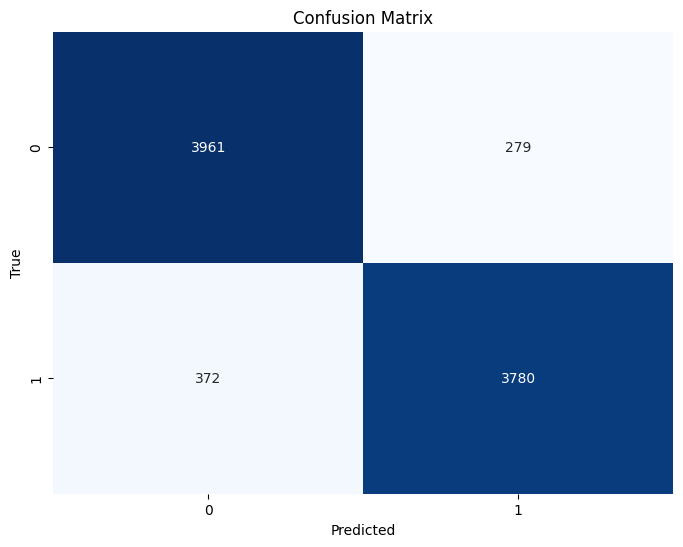

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

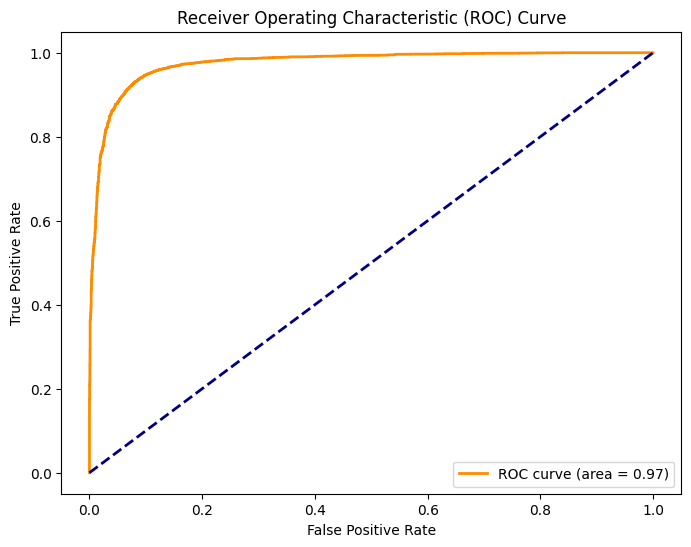

In [ ]:
# ROC Curve
y_probs = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 4. Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt_model = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Decision Tree', DecisionTreeClassifier())
])

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

CR = classification_report(y_test, y_pred)
classification_reports['Decision Tree Classifier'] = CR
print(CR)

# Decision Tree has the accuracy of 84%

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4240
           1       0.84      0.82      0.83      4152

    accuracy                           0.84      8392
   macro avg       0.84      0.84      0.84      8392
weighted avg       0.84      0.84      0.84      8392



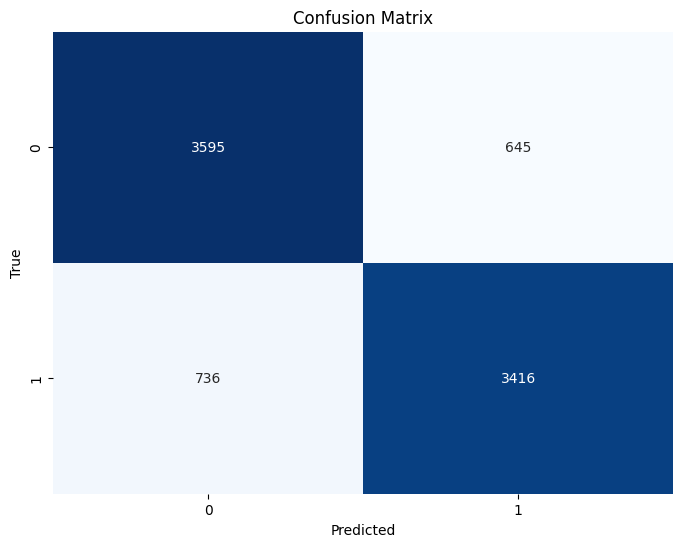

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar='False')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

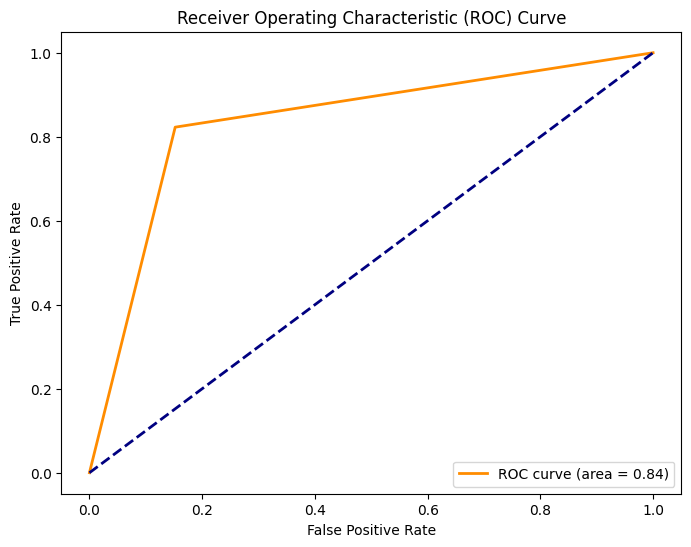

In [ ]:
# ROC Curve
y_probs = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [ ]:
# Final Ensemble Classifier
# We'll be using the ensemble voting classifier and the soft voting method. As the accuracy of Random Forest classifier and SVM
# is seen to be better than Decision Tree and Multinomial Naive Bayes, we'll be using them as the base classifiers in the ensemble classifier

from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(
    estimators=[
        ('Random Forest', rf_model),
        ('SVM', svm_model)
    ],
    voting='soft'
)

voting_classifier.fit(X_train, y_train)
y_pred = voting_classifier.predict(X_test)

CR = classification_report(y_test, y_pred)
classification_reports['Final Ensemble Classifier'] = CR
print(CR)

#Final Ensemble accuracy is 92% (when only models with best accuracy were selected)
#if we remove our best classifier that is svm, the accuracy falls down to 88%

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      4240
           1       0.93      0.92      0.92      4152

    accuracy                           0.92      8392
   macro avg       0.92      0.92      0.92      8392
weighted avg       0.92      0.92      0.92      8392



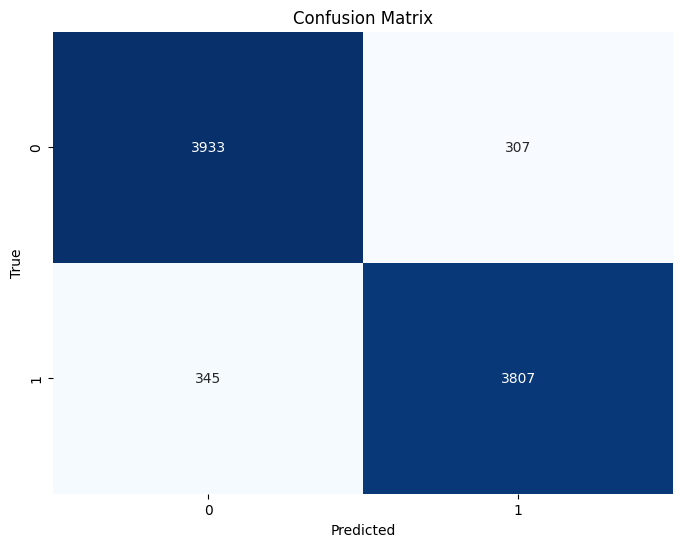

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

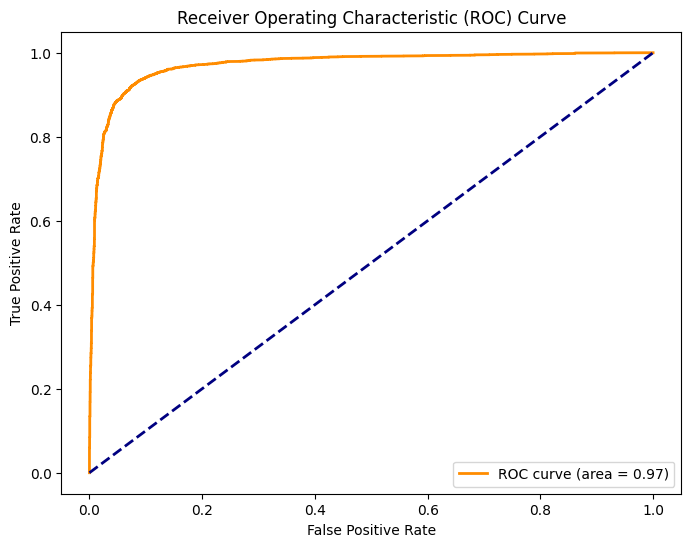

In [ ]:
# ROC Curve

y_probs = voting_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Saving the final voting classifier

import joblib

voting_classifier.fit(X_train, y_train)

joblib.dump(voting_classifier, 'voting_classifier_model.pkl')

# Later, when you want to use the model for prediction
# loaded_voting_classifier = joblib.load('voting_classifier_model.pkl')

# Assuming 'new_data' is the new data you want to predict on
# predictions = loaded_voting_classifier.predict(new_data)

['voting_classifier_model.pkl']

In [ ]:
# Hard voting trial

# from sklearn.ensemble import VotingClassifier

# voting_classifier = VotingClassifier(
#     estimators=[
#         ('Random Forest', rf_model),
#         ('SVM', svm_model)
#     ],
#     voting='hard'
# )

# voting_classifier.fit(X_train, y_train)
# y_pred = voting_classifier.predict(X_test)

# CR = classification_report(y_test, y_pred)
# classification_reports['Final Ensemble Classifier'] = CR
# print(CR)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      4240
           1       0.87      0.92      0.90      4152

    accuracy                           0.89      8392
   macro avg       0.89      0.89      0.89      8392
weighted avg       0.89      0.89      0.89      8392



In [ ]:
# Stacking

# base_models = [
#     ('SVM', SVC(probability=True)),
#     ('DecisionTree', DecisionTreeClassifier()),
#     ('RandomForest', RandomForestClassifier()),
#     ('MultinomialNB', MultinomialNB())
# ]

# Define meta-model
# meta_model = StackingClassifier(estimators=base_models)

# Create a pipeline with TF-IDF vectorizer and StackingClassifier
# pipeline = Pipeline([
#     ('vectorizer_tfidf', TfidfVectorizer()),
#     ('stacking_classifier', meta_model)
# ])

# Fit the pipeline
# pipeline.fit(X_train, y_train)

# Make predictions
# y_pred_stacking = pipeline.predict(X_test)

# Evaluate the stacking classifier
# stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
# print("Stacking Classifier Accuracy:", stacking_accuracy)

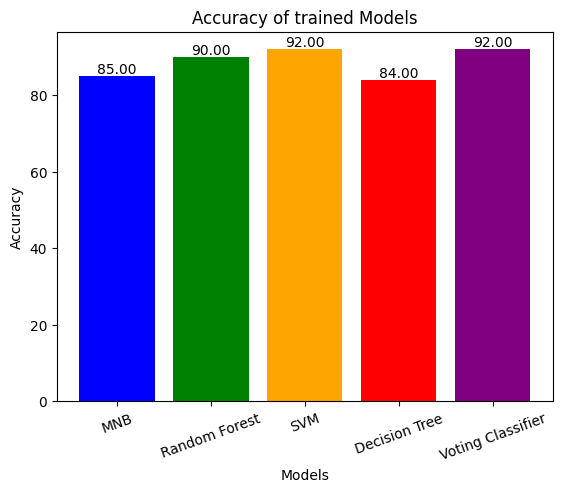

In [ ]:
# bar graphs

models = ['MNB', 'Random Forest', 'SVM', 'Decision Tree', 'Voting Classifier']
accuracy_values = [85, 90, 92, 84, 92]
colors = ['blue', 'green', 'orange', 'red', 'purple']

bars = plt.bar(models, accuracy_values, color=colors)

plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Accuracy of trained Models')
plt.xticks(rotation=20)

for bar, value in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}',
             ha='center', va='bottom')

plt.show()

plt.show('accuracy of the model')

## **BAG OF WORDS**

In [ ]:
# Results with Bag of Words vectorization Technique

# 1. Multinomial Naive Bayes Classifier

from sklearn.feature_extraction.text import CountVectorizer

mnb_bow_model = Pipeline([
     ('vectorizer_bow',CountVectorizer()),
     ('MultinomialNB', MultinomialNB())
])

mnb_bow_model.fit(X_train, y_train)

y_pred = mnb_bow_model.predict(X_test)

CR = classification_report(y_test, y_pred)
classification_reports['Multinomial Naive Bayes Classifier (BOW)'] = CR
print(CR)

# Accuracy is 84%

In [ ]:
#2. Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_bow_model = Pipeline([
     ('vectorizer_bow',CountVectorizer()),
     ('Random Forest', RandomForestClassifier())
])

rf_bow_model.fit(X_train, y_train)

y_pred = rf_bow_model.predict(X_test)

CR = classification_report(y_test, y_pred)
classification_reports['Random Forest Classifier'] = CR
print(CR)

# Accuracy is 90%

In [ ]:
# 3. Support Vector Machine

from sklearn.svm import SVC

svm_bow_model = Pipeline([
     ('vectorizer_bow',CountVectorizer()),
     ('SVC', SVC(probability=True))
])

svm_bow_model.fit(X_train, y_train)

y_pred = svm_bow_model.predict(X_test)

CR = classification_report(y_test, y_pred)
classification_reports['Support Vector Machine'] = CR
print(CR)

#

In [ ]:
# 4. Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt_bow_model = Pipeline([
     ('vectorizer_bow',CountVectorizer()),
     ('Decision Tree', DecisionTreeClassifier())
])

dt_bow_model.fit(X_train, y_train)

y_pred = dt_bow_model.predict(X_test)

CR = classification_report(y_test, y_pred)
classification_reports['Decision Tree Classifier'] = CR
print(CR)

In [ ]:
# Final Ensemble Classifier
# We'll be using the ensemble voting classifier and the soft voting method. As the accuracy of Random Forest classifier, SVM, Gradient Bossting & Multinomial Naive Bayes
# is seen to be better than Decision Tree, we'll be using them as the base classifiers in the ensemble classifiers

from sklearn.ensemble import VotingClassifier

voting_classifier_bow = VotingClassifier(
    estimators=[
        ('SVM', svm_bow_model),
        ('Random Forest', rf_bow_model),
    ],
    voting='soft'  # Soft voting for probability-based weighting
)

voting_classifier_bow.fit(X_train, y_train)
y_pred = voting_classifier_bow.predict(X_test)

CR = classification_report(y_test, y_pred)
classification_reports['Final Ensemble Classifier'] = CR
print(CR)